In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats

# 레티나 디스플레이 설정
set_matplotlib_formats('retina')

df = pd.read_csv('../PROCESSED/merged_customer_info.csv')
# 병합 데이터 불러오기

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [78]:
clust_list = ['평균순수익','평균수량','Clicked','Used','총거래량']
#클러스터링 대상 열 분리

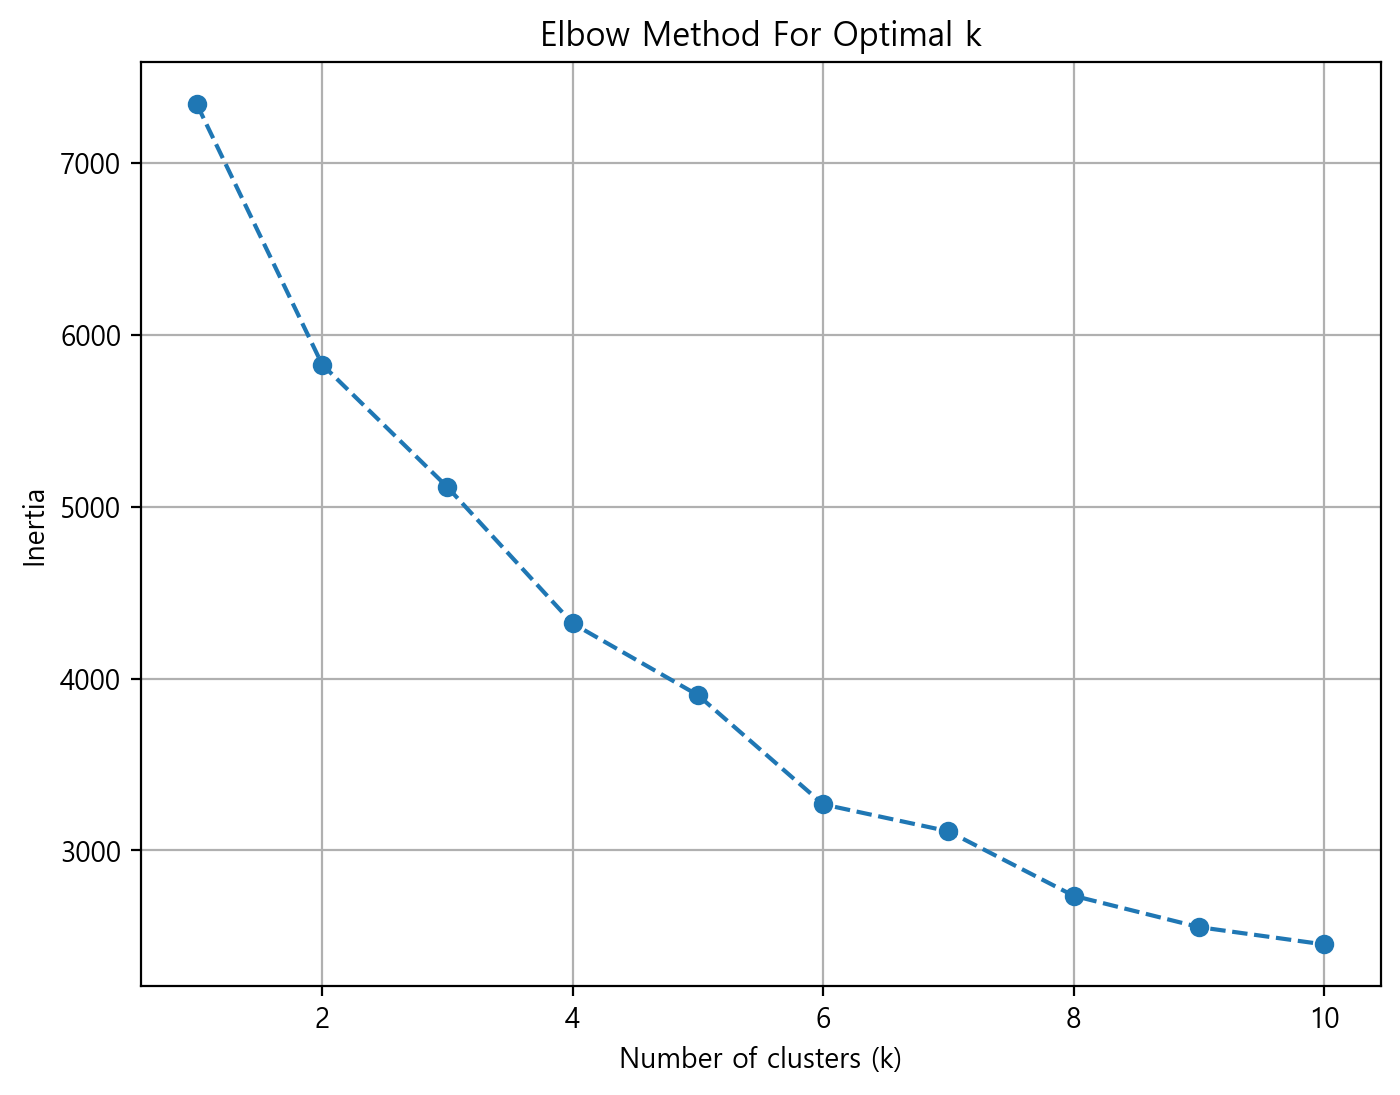

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaler_df = std_scaler.fit_transform(df[clust_list])

def plot_elbow(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
plot_elbow(scaler_df,10)
# 최적의 k값은 4라고 볼 수 있음. 다소 애매함

# 엘보 플롯 시각화 및 스케일링

In [93]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto') #최적 클러스터 수 4
kmeans.fit(scaler_df)
predict_clst = kmeans.predict(scaler_df)
df['클러스터'] = predict_clst
# 클러스터 수행

In [ ]:
df.to_csv('../PROCESSED/clustered_df.csv',index=False)

In [185]:
clust_result = df.groupby('클러스터')[clust_list].mean()
# 클러스터 결과 확인
clust_result['총수익'] = clust_result['평균순수익'] * clust_result['총거래량']
# 총수익 결과 생성
np.round(clust_result,2)*100

# 0: 체리픽커 고객 , 총 수익이 가장 낮으며 쿠폰 사용량이 가장 높음.
# 1: 쿠폰 사용 고민 고객, 총 수익이 낮은 편이며 쿠폰을 클릭만 한 비율이 높음.
# 2: vip 고객, 평균 순수익은 낮은 편이나 거래량이 높아서 총 수익이 가장 높음.
# 3: 대량구매 고객, 대량 구매하는 경우가 많아, 총 거래량이 낮은 편임에도 총수익이 높음.

,평균순수익,평균수량,Clicked,Used,총거래량,총수익
클러스터,,,,,,
0,6349.0,489.0,21.0,65.0,1924.0,122139.0
1,7266.0,408.0,74.0,14.0,2215.0,160946.0
2,5324.0,310.0,47.0,35.0,5187.0,276162.0
3,16678.0,4152.0,48.0,39.0,1439.0,240038.0


In [184]:
one_buy_clust = df.groupby(['클러스터'])['일회성구매고객'].value_counts().unstack()
sum_one_buy_clust = one_buy_clust.sum(axis=1)
div_one_buy_clust = one_buy_clust.div(sum_one_buy_clust,axis=0)
# 클러스터별 일회성구매고객 비율 측정
np.round(div_one_buy_clust,2)*100
# 2는 일회성구매고객 비율이 가장 적음, 0과1 은 비슷한 수준, 3이 가장 높음

일회성구매고객,0,1
클러스터,,
0,34.0,66.0
1,34.0,66.0
2,52.0,48.0
3,21.0,79.0


In [161]:
one_county_clust = df.groupby(['클러스터'])['거주지역'].value_counts().unstack()
sum_one_county_clust = one_county_clust.sum(axis=1)
div_one_county_clust = one_county_clust.div(sum_one_county_clust,axis=0)
# 클러스터별 일회성구매고객 비율 측정
np.round(div_one_county_clust,2)*100
# 0,1,2는 크게 다른 양상을 보이지 않으나, 3은 뉴저지,워싱턴DC의 비율이 크게 높음.

거주지역,California,Chicago,New Jersey,New York,Washington DC
클러스터,,,,,
0,33.0,30.0,9.0,22.0,6.0
1,32.0,31.0,11.0,22.0,4.0
2,31.0,32.0,9.0,22.0,5.0
3,21.0,18.0,32.0,14.0,14.0


In [183]:
item_list = df.columns[3:-10].tolist()
clust_item_ratio = np.round(df.groupby(['클러스터'])[item_list].mean()*100,1)
# 클러스터별 구매 아이템 비율의 차이 확인
clust_item_ratio
# 0,1,2에서 구매 아이템 간 큰 차이를 보이지 않음.
# 3은 Apperel,Nest-USA 제품군의 비율이 작고, Lifestyle,Office 제품군에서 높은 구매 비율을 보임
# Nest, Housewares, Notebooks & Journals 에서도 차이를 보이긴 하나, 위 제품군보다는 차이가 작음.

,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
클러스터,,,,,,,,,,,,,,,,
0,0.5,0.0,21.5,5.2,0.6,8.9,0.1,1.3,0.4,7.8,2.8,0.5,19.2,2.0,28.5,0.7
1,0.2,0.0,22.2,4.1,0.6,9.2,0.2,1.4,0.7,7.5,3.6,0.4,22.3,2.5,24.2,0.8
2,0.5,0.1,24.7,4.4,0.9,10.6,0.2,1.0,0.5,8.4,2.3,0.4,18.2,2.4,24.6,0.8
3,0.0,0.0,8.4,6.9,0.0,11.5,0.0,0.6,3.2,17.9,0.1,0.0,0.8,6.3,44.0,0.3
